In [1]:
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest

In [3]:
file_pathreal = 'realdist5_.csv'
ddff = pd.read_csv(file_pathreal)
percent=ddff['Percent'][0:20]
freq=ddff['Frequency'][0:20]

In [4]:
file_path = 'election_size.csv'
df = pd.read_csv(file_path)

In [5]:
sumofvotes=[]
length=len(df)
size_list=df['Sum of votes']
for i in range(length):
    sumofvotes.append(size_list[i])

In [6]:
olqebi=[]
for i in range(len(df['Row Labels'])):
    nomeri=df['Row Labels'][i].split('.')[1]
    olqebi.append(nomeri)
number_of_percincts = Counter(olqebi)

In [7]:
listofpers=[]
counts_list = list(number_of_percincts.items())
for i in range(len(counts_list)):
    listofpers.append(counts_list[i][1])

In [8]:
new_votes=[]

firstrange=0
for i in range(len(listofpers)):
    newnew_votes=[]
    for j in range(firstrange,firstrange+listofpers[i]):
        newnew_votes.append(sumofvotes[j])
    firstrange=j+1
    new_votes.append(newnew_votes)

In [9]:
file_path_new='electoraldistrictsprb.csv'
dff = pd.read_csv(file_path_new)
olqpercantage41=dff['41'][0:-1] 
olqpercantage5=dff['5'][0:-1]
olqpercantage4=dff['4'][0:-1]
olqpercantage9=dff['9'][0:-1]
olqpercantage25=dff['25'][0:-1]

In [10]:
listprob=[]
for i in range(len(olqpercantage25)):
    problist=[]
    # Get the vote probabilities for each party in the current precinct
    prob_41 = olqpercantage41[i].strip('%')  # Remove the '%' symbol
    prob_5 = olqpercantage5[i].strip('%')    # Remove the '%' symbol
    prob_4 = olqpercantage4[i].strip('%')    # Remove the '%' symbol
    prob_25 = olqpercantage25[i].strip('%')  # Remove the '%' symbol
    prob_9 = olqpercantage9[i].strip('%')    # Remove the '%' symbol

    # Convert the probability from string to float and divide by 100
    prob_41 = float(prob_41) / 100
    prob_5 = float(prob_5) / 100
    prob_4 = float(prob_4) / 100
    prob_25 = float(prob_25) / 100
    prob_9 = float(prob_9) / 100
    
    other=1-prob_41-prob_5-prob_4-prob_25-prob_9 # the probability of other partyes that didn't cross 5% threshold
    
    problist.append(prob_41)
    problist.append(prob_25)
    problist.append(prob_5)
    problist.append(prob_4)
    problist.append(prob_9)
    problist.append(other)
    
    listprob.append(problist)

In [11]:
# Political parties and their probabilities
parties = ['Georgian Dream', 'Gakharia', 'National Movement', 'Coalition for change', 'Lelo', 'other']
party_probabilities = listprob

0
1
2
3
4
5
6
7
8
9


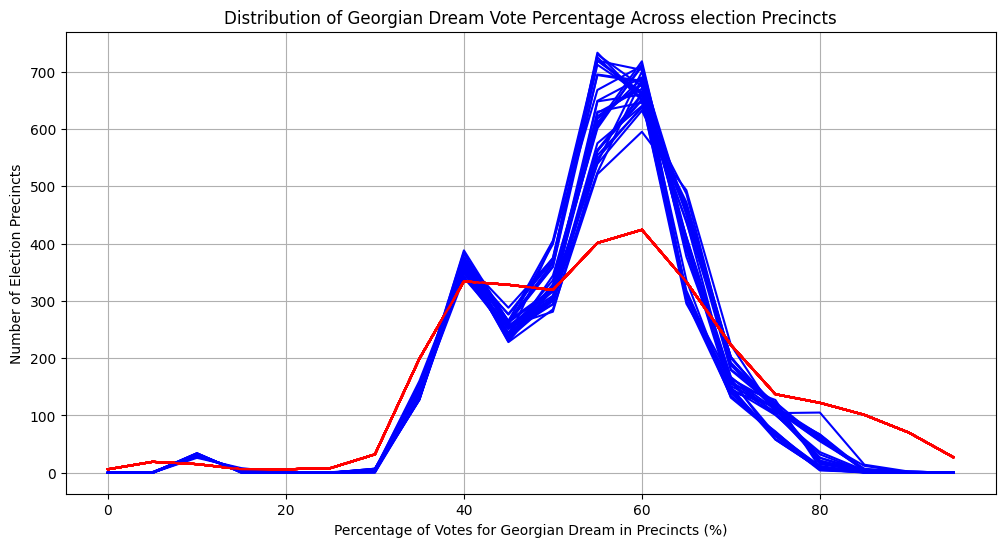

In [12]:
plt.figure(figsize=(12, 6))
numberofsimulations = 10

# Parameters for Gaussian perturbation
mean = 0  # mean of the Gaussian distribution (no bias)
std_dev = np.linspace(0, 0.1, 10)  # standard deviation (controls the spread of perturbations)
std_range=len(std_dev)
#
for std in range(std_range):

    for gd in range(numberofsimulations):

        gdricxvi=[]

        # Initialize a list to store the voting results
        party_a_percentages = []

        # Simulate votes for each precinct, applying region-specific probabilities
        firstrange = 0
        for i in range(len(listofpers)):
            region_probabilities = listprob[i]  # Get the probabilities for the current region
            region_size = listofpers[i]  # Number of precincts in this region

            for j in range(firstrange, firstrange + region_size):
                precinct_votes = []
                precinct_size = sumofvotes[j]

                # Simulate votes for each precinct using Gaussian random choice
                for _ in range(precinct_size):
                    # Apply Gaussian noise to the region's probabilities
                    noisy_probabilities = np.abs(np.array(region_probabilities) + np.random.normal(mean, std_dev[std], len(region_probabilities)))

                    for nn in range(len(noisy_probabilities)):
                        if noisy_probabilities[nn]<0:
                            noisy_probabilities[nn]=0

                    # Ensure probabilities are non-negative and normalized
                    noisy_probabilities = np.clip(noisy_probabilities, 0, None)
                    noisy_probabilities /= noisy_probabilities.sum()

                    # Choose a party based on the noisy probabilities
                    vote = random.choices(parties, noisy_probabilities)[0]
                    precinct_votes.append(vote)


                # Calculate the percentage of votes for "Georgian Dream" in the current precinct
                party_a_percentage = (Counter(precinct_votes)['Georgian Dream'] / precinct_size) * 100
                party_a_percentages.append(party_a_percentage)

                count=Counter(precinct_votes)
                countgd=count['Georgian Dream']
                gdricxvi.append(countgd)

            firstrange = j + 1

        # Plot the distribution of Georgian Dream votes
        #bins = np.linspace(min(party_a_percentages), max(party_a_percentages), 20)
        bins = np.linspace(0, 100, 21)
        hist, bin_edges = np.histogram(party_a_percentages, bins=bins)
        bin_centers = bin_edges[:-1]
        
        
        bins1 = np.linspace(0, 100, 101)
        hist1, bin_edges1 = np.histogram(party_a_percentages, bins=bins1)
        bin_centers1 = bin_edges1[:-1]

        if(0.53<sum(gdricxvi)/2076000<0.55):
            plt.plot(bin_centers, hist, linestyle='-', color='blue')
            plt.plot(percent, freq, color='red')
    
    print(std)

plt.xlabel('Percentage of Votes for Georgian Dream in Precincts (%)')
plt.ylabel('Number of Election Precincts')
plt.title('Distribution of Georgian Dream Vote Percentage Across election Precincts')
plt.grid(True)
plt.show()

In [13]:
sum(gdricxvi)/2076000

0.49635067437379576

In [1]:
import pandas as pd
cesko_data = pd.read_csv('Statistics of CESKO.csv')


In [3]:
import matplotlib.pyplot as plt


In [5]:
simulated_data = pd.read_csv('realdist5_.csv')
print(simulated_data.head())


   Percent  Frequency  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0      0.0        6.0         NaN         NaN         NaN         NaN   
1      5.0       19.0         NaN         NaN         NaN         NaN   
2     10.0       15.0         NaN         NaN         NaN         NaN   
3     15.0        6.0         NaN         NaN         NaN         NaN   
4     20.0        6.0         NaN         NaN         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN         NaN         NaN  


In [6]:
simulated_data = simulated_data.rename(columns={'Percent': 'Percent Bin', 'Frequency': 'Simulated Frequency'})


In [8]:
cesko_data['Percent Bin'] = pd.cut(
    cesko_data['GD Share of the turnout'], 
    bins=[0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 
          0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00],
    labels=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
)


In [9]:
official_counts = cesko_data['Percent Bin'].value_counts(sort=False).reset_index()
official_counts.columns = ['Percent Bin', 'Official Frequency']


In [11]:
merged_data = simulated_data.merge(official_counts, on='Percent Bin', how='outer').fillna(0)


/tmp/ipykernel_6423/2611032470.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data = simulated_data.merge(official_counts, on='Percent Bin', how='outer').fillna(0)


In [12]:
merged_data = merged_data.infer_objects(copy=False)


In [13]:
print(merged_data.dtypes)


Percent Bin            float64
Simulated Frequency    float64
Unnamed: 2             float64
Unnamed: 3             float64
Unnamed: 4             float64
Unnamed: 5             float64
Unnamed: 6             float64
Unnamed: 7             float64
Unnamed: 8             float64
Official Frequency     float64
dtype: object


In [15]:
merged_data = simulated_data.merge(official_counts, on='Percent Bin', how='outer').fillna(0)


In [16]:
merged_data = merged_data[['Percent Bin', 'Simulated Frequency', 'Official Frequency']]


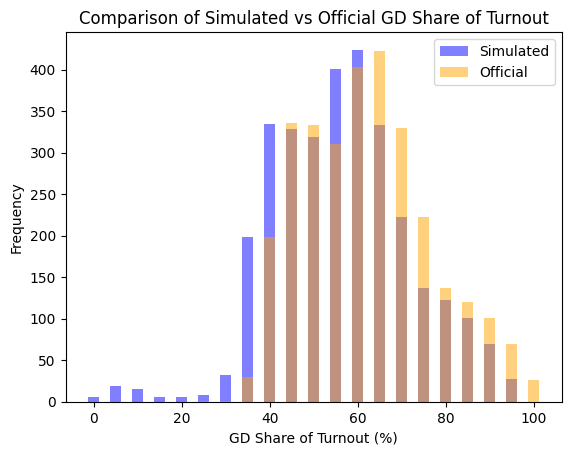

In [17]:
import matplotlib.pyplot as plt

# Bar plot for comparison
plt.bar(merged_data['Percent Bin'], merged_data['Simulated Frequency'], 
        alpha=0.5, label='Simulated', color='blue', width=2.5)
plt.bar(merged_data['Percent Bin'], merged_data['Official Frequency'], 
        alpha=0.5, label='Official', color='orange', width=2.5)

# Label and title
plt.xlabel("GD Share of the turnout (%)")
plt.ylabel("Frequency")
plt.title("Comparison of Simulated vs Official GD Share of Turnout")
plt.legend()
plt.show()


In [14]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load simulated data
simulated_data = pd.read_csv('realdist5_.csv')
simulated_data = simulated_data[['Percent', 'Frequency']]

# Step 2: Prepare official data
# Create bins based on Percent column
bins = simulated_data['Percent'].tolist() + [100]  # Adding upper limit for 100%
cesko_data['Percent Bin'] = pd.cut(cesko_data['GD Share of the turnout'] * 100, bins=bins, labels=simulated_data['Percent'])

# Group official data into frequency counts
official_counts = cesko_data['Percent Bin'].value_counts(sort=False).reset_index()
official_counts.columns = ['Percent', 'Official Frequency']

# Step 3: Merge simulated and official data
comparison_data = simulated_data.merge(official_counts, on='Percent', how='left').fillna(0)

# Step 4: Plot comparison
plt.bar(comparison_data['Percent'], comparison_data['Frequency'], alpha=0.5, label='Simulated', color='blue', width=3)
plt.bar(comparison_data['Percent'], comparison_data['Official Frequency'], alpha=0.5, label='Official', color='orange', width=3)

plt.xlabel("GD Share of Turnout (%)")
plt.ylabel("Frequency")
plt.title("Comparison of Simulated vs Official GD Share of Turnout")
plt.legend()
plt.show()



ValueError: bins must increase monotonically.

In [20]:
print(simulated_data.columns)


Index(['Percent', 'Frequency', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
